In [213]:
from math import *
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

The class for all nodes in the graph. Note that every node contains a list of its neigbors. I wrote this class some time ago for another project. Not all atritubtes and fuctions of the node class are used in the notebook.

In [4]:
class node:

    def __init__(self, x,y):

        self.x = x
        self.y = y
        self.coordinates = (x,y)
        self.list_of_neigbors = []
        self.visited = False
        self.dis_to_target = float('inf')
        self.previous = []
    
    def add_neighbor(self, node):

        self.list_of_neigbors.append((node, self.dis_to(node)))
    
    def dis_to(self, node):

        return sqrt((node.x - self.x)**2 + (node.y - self.y)**2)
    
    def visit(self):
        self.visited = True




Inicialize the graph - conect all notes to each other.

In [214]:
graph = []
nodes = [(0, 2),(2, 5),(5, 2),(6, 6),(8, 3)]

#create all nodes
for this_node in nodes:

    graph.append(node(this_node[0],this_node[1]))

#add neighbors to the node
for i in range(len(graph)):

    for neighbor in graph:

            if graph[i].coordinates != neighbor.coordinates:

                graph[i].add_neighbor(neighbor)

I decided to implement the 2-OPT algorithm to finf the shortest path. There are many explenations of this algorithm to be found online, including their runningtime analyisis and the proof of correctness. https://www.youtube.com/watch?v=dYEWqrp-mho 

This is why I need an inicial path to start the  algorithm. This inicial path is constructed in the field below. Just some random path. Note, a 'path' in the following notebook is aleays goint to be a list which contains node-objects.

In [419]:
path = graph[1:].copy()
shuffle(path)
path.insert(0,graph[0])
path.append(path[0])

This fuction calculates the distance/length of one path.

In [420]:
def get_len_path(path):

    length = 0

    for i in range(1,len(path)):
        length += path[i-1].dis_to(path[i])  

    return length

This fuction prints the path as requiered:

In [421]:
def print_path(path):

    path_string = str(path[0].coordinates)
    path_length = 0

    for i in range(1,len(path)):

        path_length += path[i-1].dis_to(path[i])
    
        path_string += ' -> ' + str(path[i].coordinates) + '[' + str(path_length) + ']'
    
    path_string += ' = [' + str(path_length) + ']'
    
    return path_string

This fuction builds a visual representation of some path

In [428]:
def plot_path(path):

    vectors = []
    origins = [[],[]]

    for i in range(len(path)-1):

        vector = [path[i+1].x - path[i].x, path[i+1].y - path[i].y]
        vectors.append(vector)
    
  
        origins[0].append(path[i].x)
        origins[1].append(path[i].y)

    V = np.array(vectors)
    origin = np.array(origins) # origin point

    plt.quiver(*origin, V[:,0], V[:,1], angles='xy', scale_units='xy', scale=1, color = ['m','g','r','b','y'])
    scatter(*origin, s=100 ,marker='o', c=['black'])
    plt.xlim(-2, 9)
    plt.ylim(0, 7)
    plt.show()

Let's first check our random path before we proceed:

(0, 2) -> (8, 3)[8.06225774829855] -> (5, 2)[11.224535408466929] -> (6, 6)[15.347641034084589] -> (2, 5)[19.47074665970225] -> (0, 2)[23.076297935166238] = [23.076297935166238]


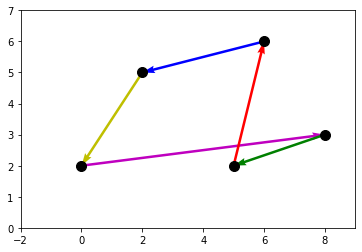

In [429]:
print(print_path(path))
plot_path(path)

The following fuction computes all 2-opt mutations for a given path and checks whether the new path-mutation leads to a lower distance of the current path. There are some different approaches of the 2-opt algorithm, which differ from each other in the way they select the new improved path. One approach is to compute all possible mutations of the path, calculate path length of all mutations and select the path with the lowest length of all mutations. I, however, implemented another approach in which I pick the first path mutation which already results in a shorter length and proceed the 2-opt algorithm on this path mutation. 

The following fuction is a recursive fuction:

In [326]:
def two_opt(path):

    current_path_len = get_len_path(path)

    for i in range(len(path)-1):

        current_mutation = path.copy()

        current_mutation[i], current_mutation[i+1] = current_mutation[i+1], current_mutation[i]

        if i == 0:
            current_mutation[-1] = current_mutation[0]
        else:
            current_mutation[0] = current_mutation[-1]

        mutation_len = get_len_path(current_mutation)
        
        if mutation_len < current_path_len:
            
            path = two_opt(current_mutation)
    
    return(path)

This is the solution:

(0, 2) -> (5, 2)[5.0] -> (8, 3)[8.16227766016838] -> (6, 6)[11.76782893563237] -> (2, 5)[15.890934561250031] -> (0, 2)[19.49648583671402] = [19.49648583671402]


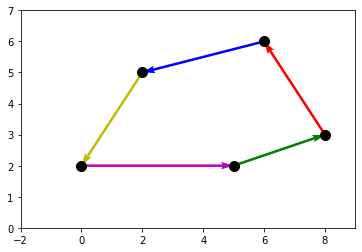

In [430]:
print(print_path(two_opt(path)))
plot_path(two_opt(path))